In [1]:
from src.DataFolder import DataFolder
from src.NeuralSignal import NeuralSignal
from src.runtime_logger import logger_setup

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = "/home/miranjo/phasic_tonic/data/processed"
config_path = "/home/miranjo/phasic_tonic/configs/test.yaml"

## Setup

### Load the config file

In [2]:
with open(config_path, 'r') as f:
    args = yaml.safe_load(f)

fs                  = args.pop("fs")
f_theta             = (args.pop("f_theta_lower"), args.pop("f_theta_upper"))
f_lowpass           = args.pop("f_lowpass")
lowpass_length      = args.pop("lowpass_length")
bandpass_length     = args.pop("bandpass_length")
threshold_bycycle   = args.pop("threshold_bycycle")
threshold_episode   = args.pop("threshold_episode")

# Start logger
#logger_setup()

### Load the dataset

In [3]:
remFolder = DataFolder(data_path)

# Analysis

## Sample

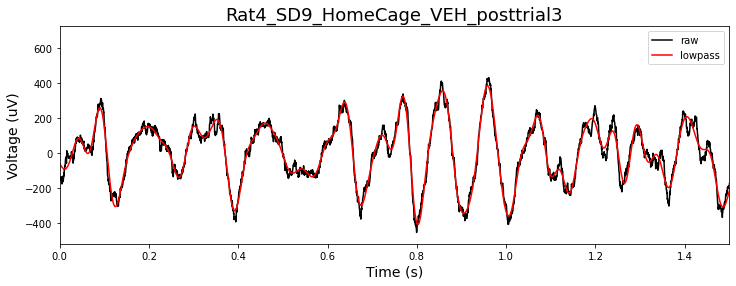

In [4]:
remData = remFolder[3]
arrays = remData["data"]
metadata = remData["metadata"]

theta = NeuralSignal(arrays[0], fs)
theta.set_metadata(metadata)
theta.filter("lowpass", f_range=f_lowpass, n_seconds=lowpass_length)
theta.plot(xlim=(0,1.5), figsize=(12,4))

## Dataset

In [ ]:
for sample in remFolder:
    lfpREMs = sample["data"]
    metadata = sample["metadata"]
    
    #
    # Further conditions
    #
    
    for lfpREM in lfpREMs:
        if(len(lfpREM) < 2500): 
            break    #Skip when the duration is less than a second
        
        theta = NeuralSignal(lfpREM, fs)
        theta.filter('lowpass', f_range=f_lowpass, n_seconds=lowpass_length)
        theta.segment(f_range=f_theta, threshold_episode=threshold_episode, threshold_bycycle=threshold_bycycle)

        for tonic in theta.get_tonic():
            #
            #   Further analysis on the tonic cycles
            #
        
        for phasic in theta.get_phasic():
            #
            #   Further analysis on the phasic cycles
            #